# Week 05, Part 1

### Topic
 1. For reference: about plotting polygons in R (we won't go over this, but it serves as reference)
 1. Plotting normal distributions
    1. Example: Manufacturing rulers
 1. BACK TO SLIDES FOR PERCENTILES


In [5]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=8)

## 1. Intro to polygons in R

Now we'll go over some useful functions associated with drawing normal distributions.  First, a little intro of sequences and polygons:

In [6]:
x = seq(-3,3, length=10)
print(x)

 [1] -3.0000000 -2.3333333 -1.6666667 -1.0000000 -0.3333333  0.3333333
 [7]  1.0000000  1.6666667  2.3333333  3.0000000


Now, lets try to understand a `polygon` function.  We'll use this to help us draw areas using the `plot_polygons.R` script, but let's look at a few `polygon` examples.

Let's make a triangle -- say the triangle goes from -3 to +3 in x & 0-1 in y:

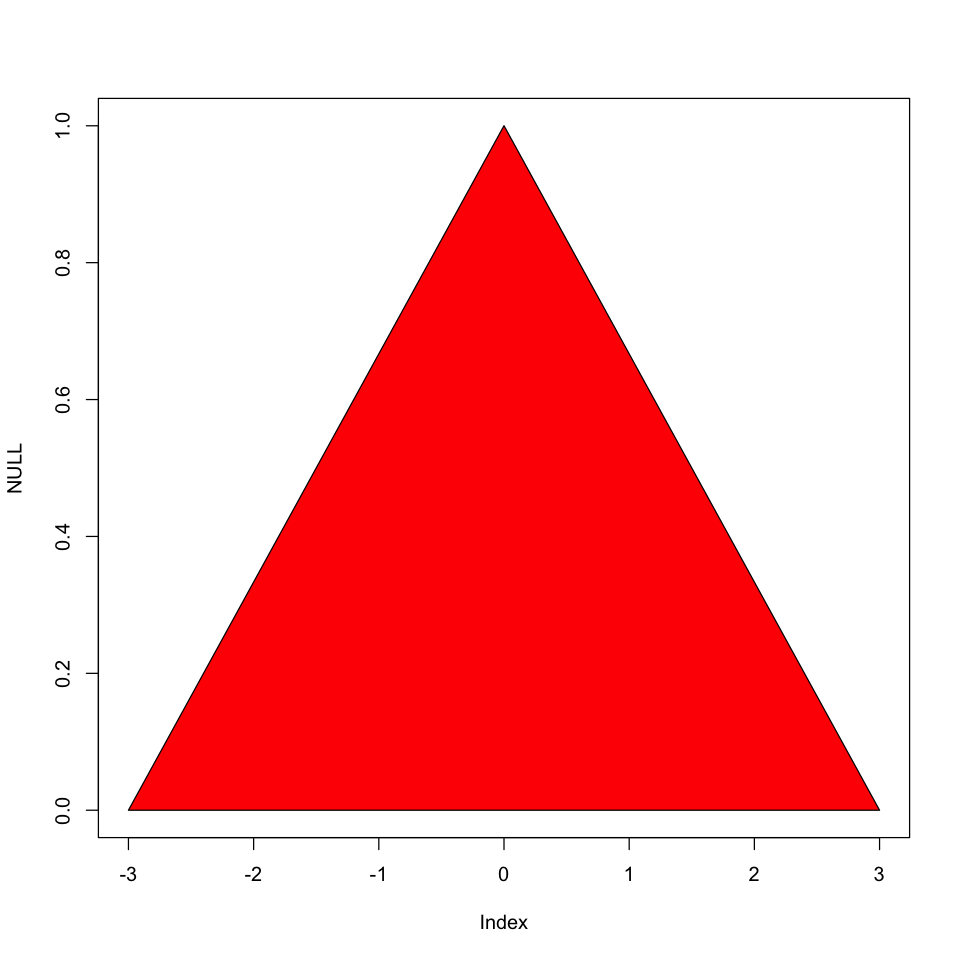

In [7]:
plot(NULL,xlim=c(-3,3),ylim=c(0,1)) # sets up axes
xvertices = c(-3, 0, 3)
yvertices = c(0, 1, 0)
polygon(xvertices, yvertices,col="red") # plots on top of previous plot

Let's try overplotting a little rectangle at x = (-1,1), y = (0.4,0.6):

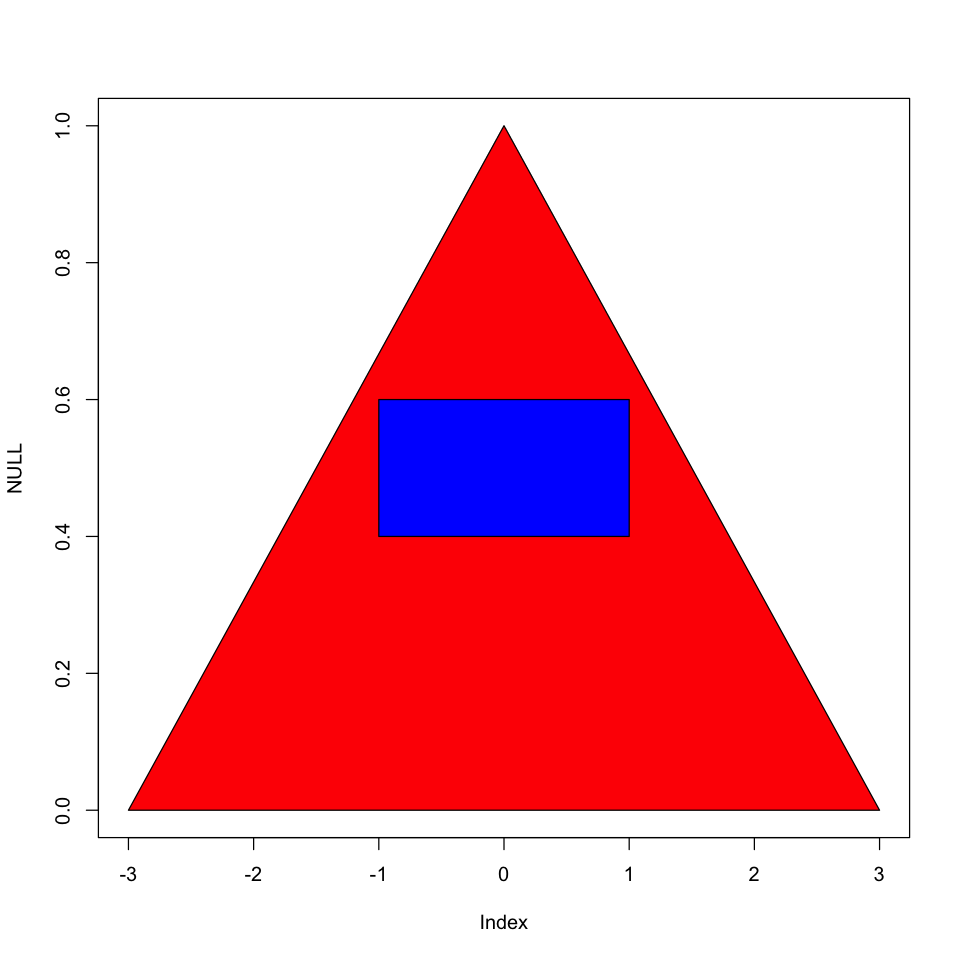

In [8]:
# set up empty axis
plot(NULL,xlim=c(-3,3),ylim=c(0,1)) # sets up axes

# red triangle
xvertices = c(-3, 0, 3)
yvertices = c(0, 1, 0)
polygon(xvertices, yvertices,col="red") # plots on top of previous plot

# blue rectangle
xvertices = c(-1, -1, 1, 1)
yvertices = c(0.4, 0.6, 0.6, 0.4)
polygon(xvertices, yvertices, col="blue")

Essentially, polygon just fills in between a list of verticies we give it.  We can use this to plot underneath our normal distributions.  This will help us get a "feel" for how much of the graph is related to our measurement of interest.

## 2. Plotting normal distributions

Now, let's build some tool's we will need to examine normal distributions.

(1) Let's plot them using "dnorm" moving onto normal distributions. First, let's start by plotting a normal distribution:

In [9]:
help(dnorm)

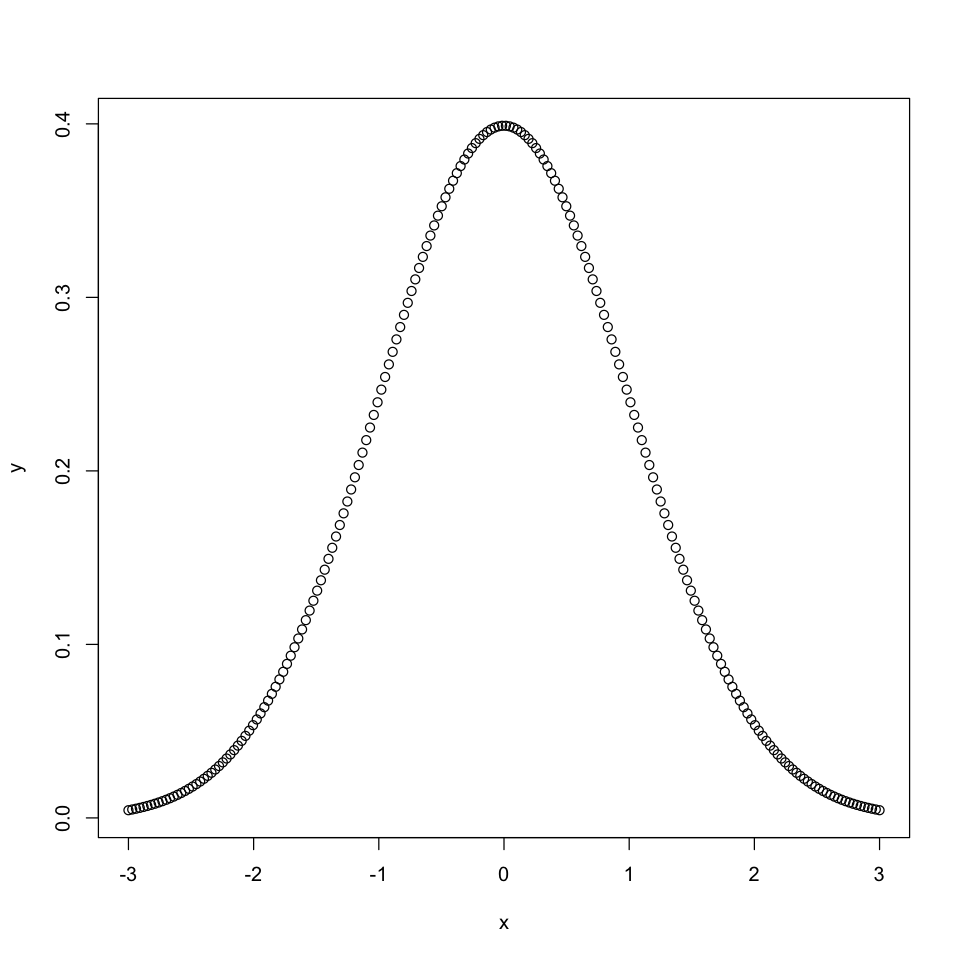

In [10]:
x=seq(-3,3,length=200)
y=dnorm(x, mean=0, sd=1)
plot(x,y)

Let's make a little fancier of a plot:

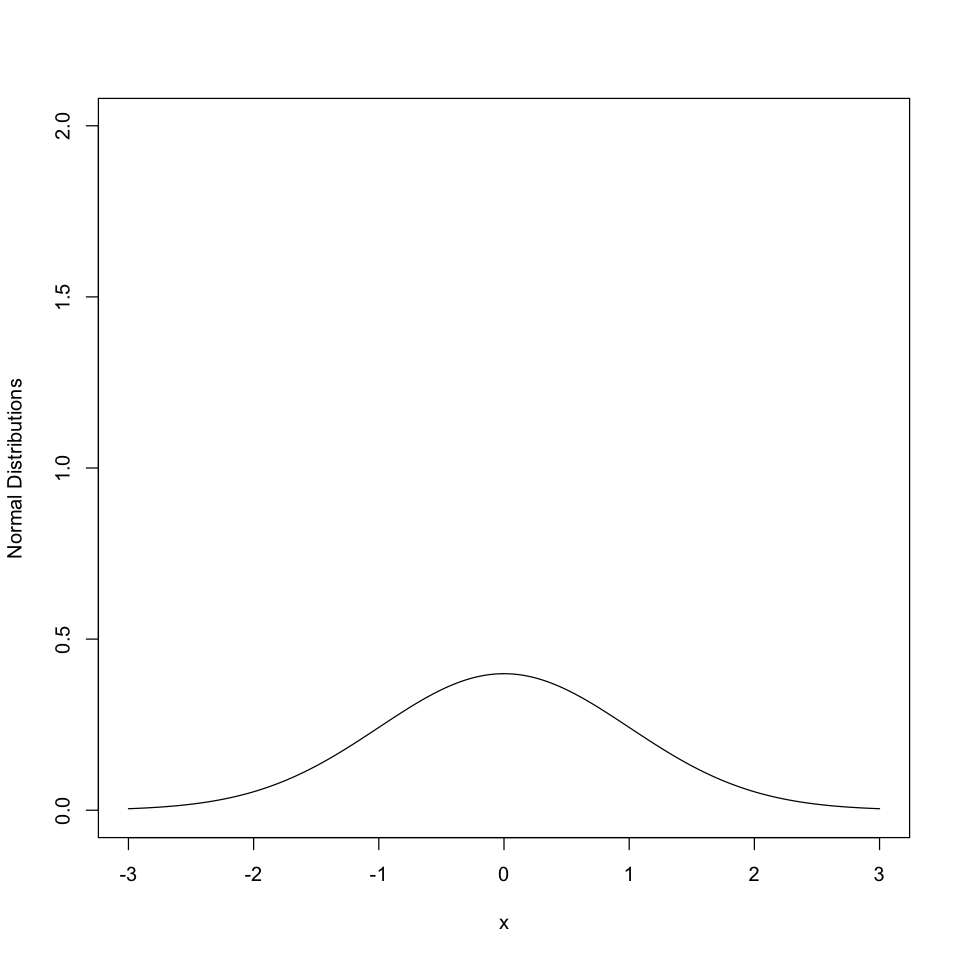

In [11]:
x = seq(-3,3,length=200) # plotting normal dist. -3,3 SD
y1 = dnorm(x, mean=0, sd=1)
plot(x,y1, type='l', ylim=c(0,2), ylab='Normal Distributions')

Overplot a few other normal distributions:

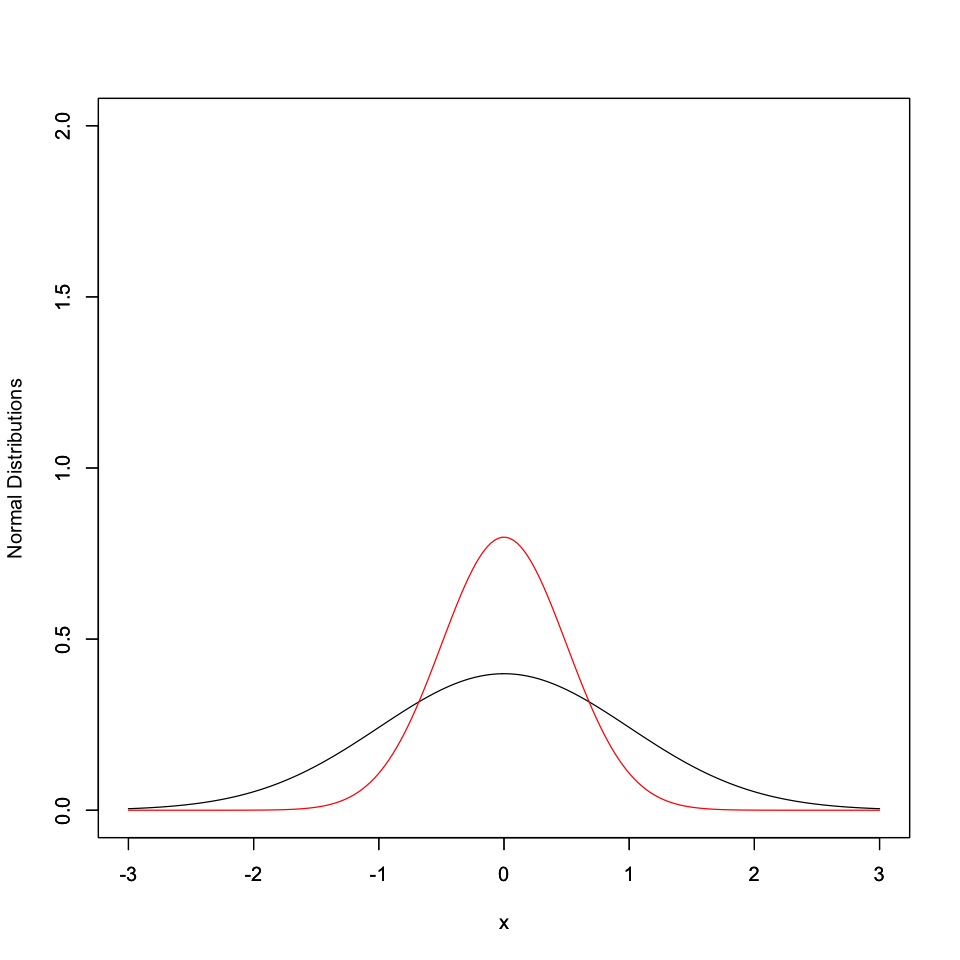

In [12]:
# orig plot
x = seq(-3,3,length=200) # plotting normal dist. -3,3 SD
y1 = dnorm(x, mean=0, sd=1)
plot(x,y1, type='l', ylim=c(0,2), ylab='Normal Distributions')

# other distribution
y2 = dnorm(x, mean=0, sd=0.5)
par(new=TRUE) # for overplotting
plot(x, y2, type='l', col='red', ylim=c(0,2), ylab="")

Let's add to this by visualizing a Z-score and actually calculating it as well.  We'll go back to just one normal distribution.

Z-scores: remember this is a measure of how "far off" a score is from the mean.

So first, as is always a good example, let's plot!

In [13]:
x = seq(-6,6,length=200)
mean_dist = 1.0
sd_dist = 0.5

Note here: I'm calling the dnorm function directly in the "y" data position of this function this is instead of doing "y = dnorm..."

Its just us being fancy :)

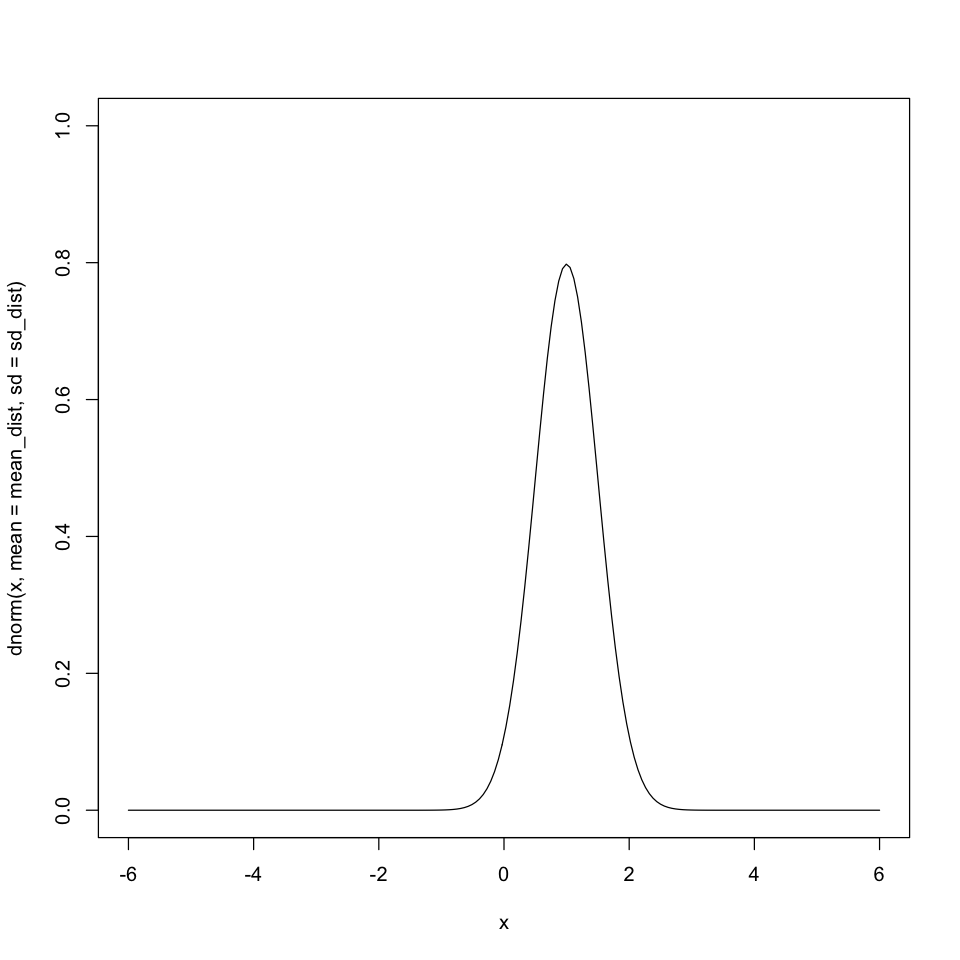

In [14]:
plot(x,dnorm(x,mean=mean_dist,sd=sd_dist),ylim=c(0,1.0), type='l')

Let's say I want the Zscore for x=2.5 - i.e. given this normal distribution, if I measure pick out an observation that is at the value of 2.5, how off from the mean is it? First of course, lets plot!

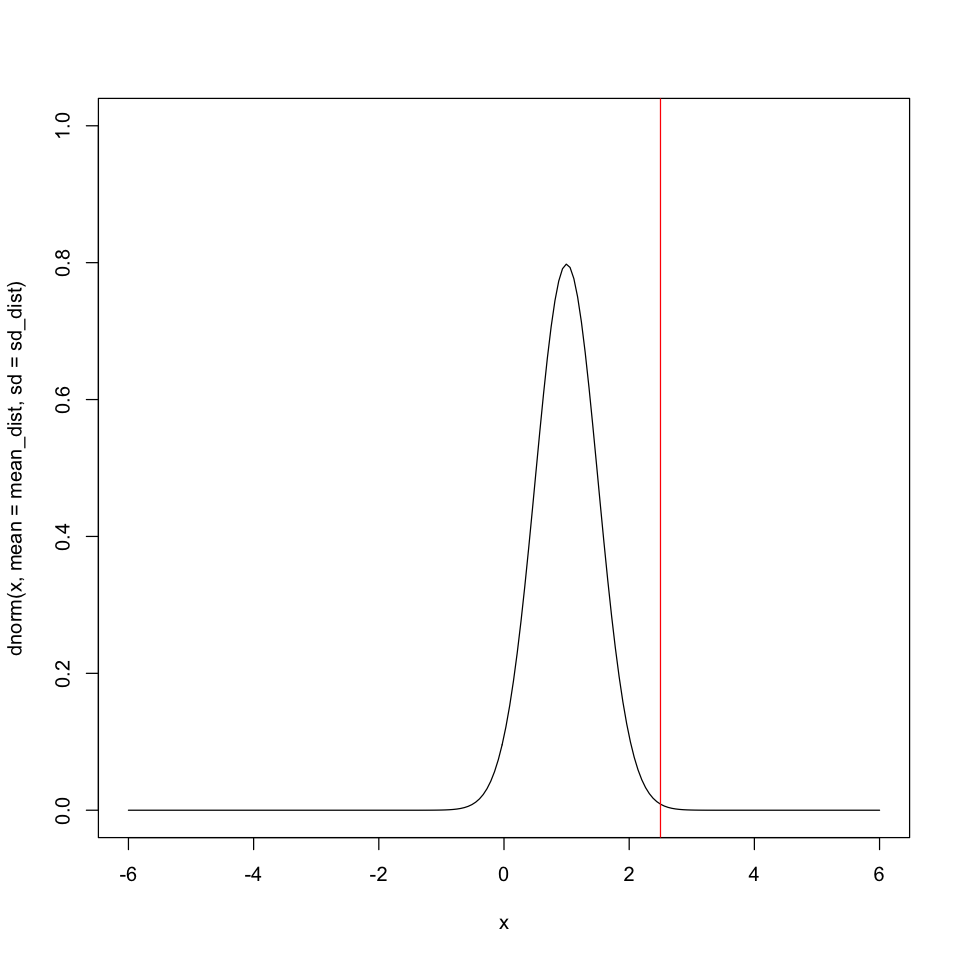

In [15]:
plot(x,dnorm(x,mean=mean_dist,sd=sd_dist),ylim=c(0,1.0), type='l')
abline(v=2.5,col="red")

We can see already that its pretty far off from the mean here $\rightarrow$ if we by eye try to compare the area to the right of this line (the little tail) it is very small compared to the area to the left - so we expect our Z-score to be pretty big!

Now let's actually calculate.  Recall: $Z_{score} = \frac{observation - mean}{SD}$

In [16]:
Zscore = (2.5 - mean_dist)/sd_dist
print(Zscore)

[1] 3


This is saying our measurement of 2.5 is 3 times bigger than the standard deviation of our normal distribution.  So pretty gosh-darn big!

Now, let's say I've got a 2nd distribution with mean = 0.5 and sd=2, is the $Z_{score}$ at x=2.5 higher or lower than the first one?

As always, let's start by plotting:

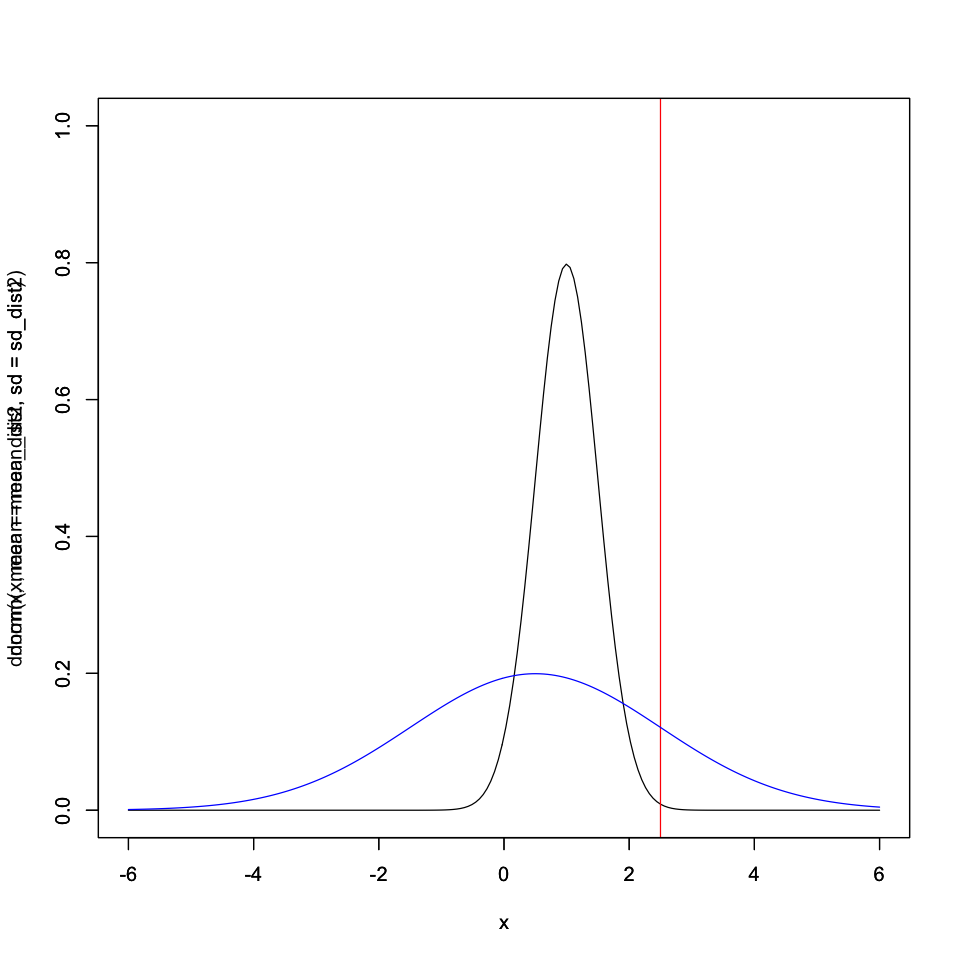

In [17]:
# old plot
plot(x,dnorm(x,mean=mean_dist,sd=sd_dist),ylim=c(0,1.0), type='l')
abline(v=2.5,col="red")

# 2nd distribution
mean_dist2 = 0.5
sd_dist2 = 2.0
par(new=TRUE) # overplot on our original axis
plot(x,dnorm(x,mean=mean_dist2,sd=sd_dist2),col="blue",ylim=c(0,1.0), type='l')

By eye we can see that the red line falls at a higher y-value on the blue, 2nd distribution this tells us at x=2.5, we are closer to the mean on the 2nd distribution so we expect a lower $Z_{score}$, but let's find out!

In [18]:
Zscore2 = (2.5-mean_dist2)/sd_dist2
print(Zscore2)

[1] 1


Indeed 1 < 3 - in our 2nd distribution, an observation of x=2.5 is only 1 SD from the mean.

$Z_{scores}$ allow us to in a sense "normalize" each normal distribution to allow for comparisions between normal distributiosn with different means & SDs.  For example, if these distributions were measuring a test then a student that scored a 2.5 on both would have done better than the overall class distribution on the first test.

### 3.A Example: Manufacturing rulers

I am the manufacturer of rulers.  My rulers should be 10cm long, but I am having issues:
  1. On Run #1 I get rulers with a mean of 11cm and an SD of 2.0cm.
  1. On Run #2 I get rulers with a mean of 10cm and an SD of 4.0cm.

Q1: Which is the better run of my manufacturing equiptment *Note: could be differing answers!* Think on this for a bit!

Q2: in each run, pull out a ruler to see how off it is.  In both runs, I pull out a 9cm ruler - how unusual is it for me to pull out a ruler of this size?

 1. Make a plot showing this & guess using the plot,
 1. Then, calculate with a Zscore and say for sure.


#### ANS 1:


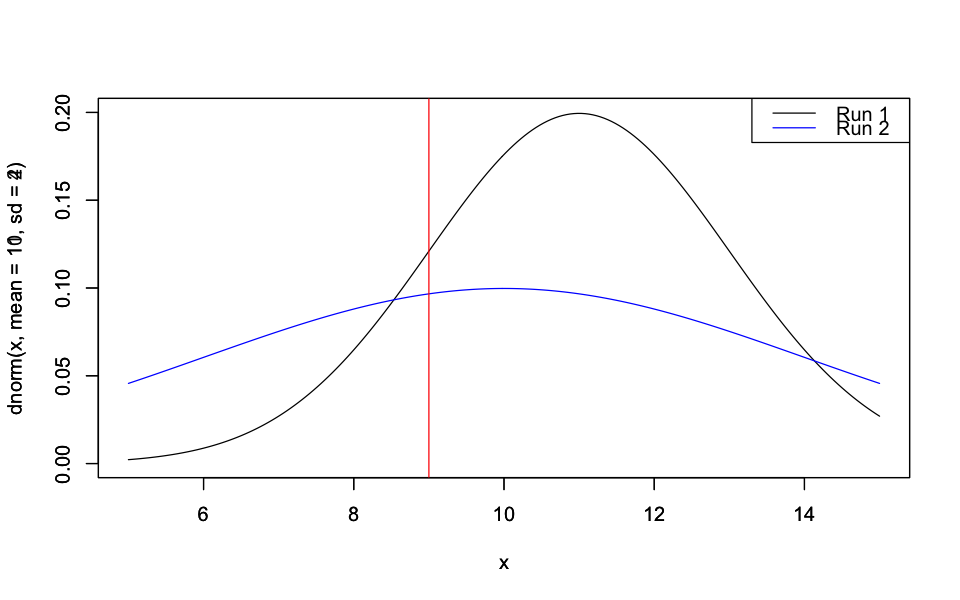

In [19]:
options(repr.plot.width=8, repr.plot.height=5) # nicer plotting window

#Plot: Run # 1: "mean of 11cm and an SD of 2.0cm"
x = seq(5,15,length=200)
plot(x,dnorm(x,mean=11,sd=2), type='l', ylim=c(0,0.2)) # further out for run #1

par(new=TRUE) # to overplot
#Plot: Run # 2: "mean of 10 cm and an SD of 4.0 cm"
plot(x,dnorm(x,mean=10,sd=4),col="blue", type='l', ylim=c(0,0.2))

#  Our observation, a 9cm ruler:
abline(v=9.0,col="red")

# To remind us what is what:
legend("topright", c("Run 1", "Run 2"), col=c("black","blue"), lw=1)

By eye, it looks like in run 1 (black) we are further from the mean (11cm), than for run 2 (blue).  So this means that it is more unusual to get this 9cm ruler in run 1 than run2

But let's do the calculation to be sure:

In [20]:
Z1 = (9.0-11)/2.0 # -1.0
Z2 = (9.0-10)/4.0 # -0.25
print(c("Run 1", "Run 2"))
print(c(Z1,Z2))

[1] "Run 1" "Run 2"
[1] -1.00 -0.25


Here -1.0 < -0.25 so run 1 is MORE SDs from the mean even though its negative!

## BACK TO SLIDES FOR PERCENTILES 